In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [207]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [209]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

# EDA (missing data)

In [210]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [211]:
df[df['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [212]:
df.drop([3,339],axis =0,inplace=True)

In [213]:
df.iloc[339]

species              Gentoo
island               Biscoe
culmen_length_mm       50.4
culmen_depth_mm        15.7
flipper_length_mm     222.0
body_mass_g          5750.0
sex                    MALE
Name: 341, dtype: object

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [215]:
df =df.dropna()

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [217]:
df['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [218]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [180]:
x =df.groupby('sex')

In [181]:
x.mean(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
.,44.500000,15.700000,217.000000,4875.000000
FEMALE,42.096970,16.425455,197.363636,3862.272727
MALE,45.854762,17.891071,204.505952,4545.684524


In [182]:
df.groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0   165.000000   168.000000
                  mean     44.5    42.096970    45.854762
                  std       NaN     4.903476     5.366896
                  min      44.5    32.100000    34.600000
                  25%      44.5    37.600000    40.975000
                  50%      44.5    42.800000    46.800000
                  75%      44.5    46.200000    50.325000
                  max      44.5    58.000000    59.600000
culmen_depth_mm   count     1.0   165.000000   168.000000
                  mean     15.7    16.425455    17.891071
                  std       NaN     1.795681     1.863351
                  min      15.7    13.100000    14.100000
                  25%      15.7    14.500000    16.075000
                  50%      15.7    17.000000    18.450000
                  75%      15.7    17.800000    19.250000
                  max      15.7    20.700000    21.500000
flipper_length_mm count     1.0   165.000000   168.000000
                  mean    217.0   197.363636   204.505952
                  std       NaN    12.500776    14.547876
                  min     217.0   172.000000   178.000000
                  25%     217.0   187.000000   193.000000
                  50%     217.0   193.000000   200.500000
                  75%     217.0   210.000000   219.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0   165.000000   168.000000
                  mean   4875.0  3862.272727  4545.684524
                  std       NaN   666.172050   787.628884
                  min    4875.0  2700.000000  3250.000000
                  25%    4875.0  3350.000000  3900.000000
                  50%    4875.0  3650.000000  4300.000000
                  75%    4875.0  4550.000000  5312.500000
                  max    4875.0  5200.000000  6300.000000

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [184]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [201]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [220]:
df['sex'].nunique()

3

In [222]:
df.at[336,'sex']='FEMALE'

In [223]:
df['sex'].nunique()

2

In [224]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [225]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [226]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
model = DecisionTreeClassifier()

In [231]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [232]:
base_pred = model.predict(X_test)

In [233]:
model.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [234]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [235]:
conf_matrix = confusion_matrix(y_test,base_pred)

In [236]:
conf_matrix

array([[41,  0,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

In [237]:
Disp = ConfusionMatrixDisplay(conf_matrix)

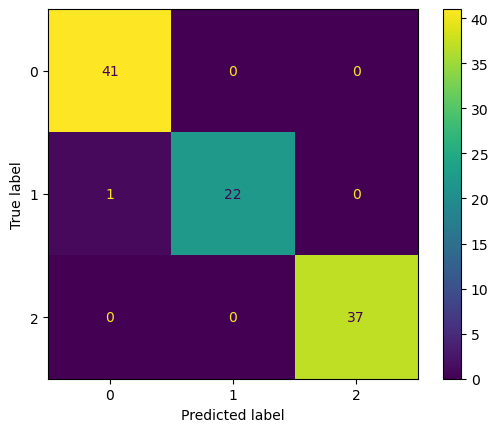

In [238]:
Disp.plot()

In [239]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       101
   macro avg       0.99      0.99      0.99       101
weighted avg       0.99      0.99      0.99       101



In [240]:
model.feature_importances_


array([0.34772106, 0.04203954, 0.53120101, 0.        , 0.0681854 ,
       0.        , 0.01085298])

In [241]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [246]:
FI=pd.DataFrame(index = X.columns,data = model.feature_importances_,columns=['Feature Importance'])

In [248]:
FI.sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.010853
culmen_depth_mm,0.042040
island_Dream,0.068185
culmen_length_mm,0.347721
flipper_length_mm,0.531201


In [262]:
from sklearn.tree import plot_tree

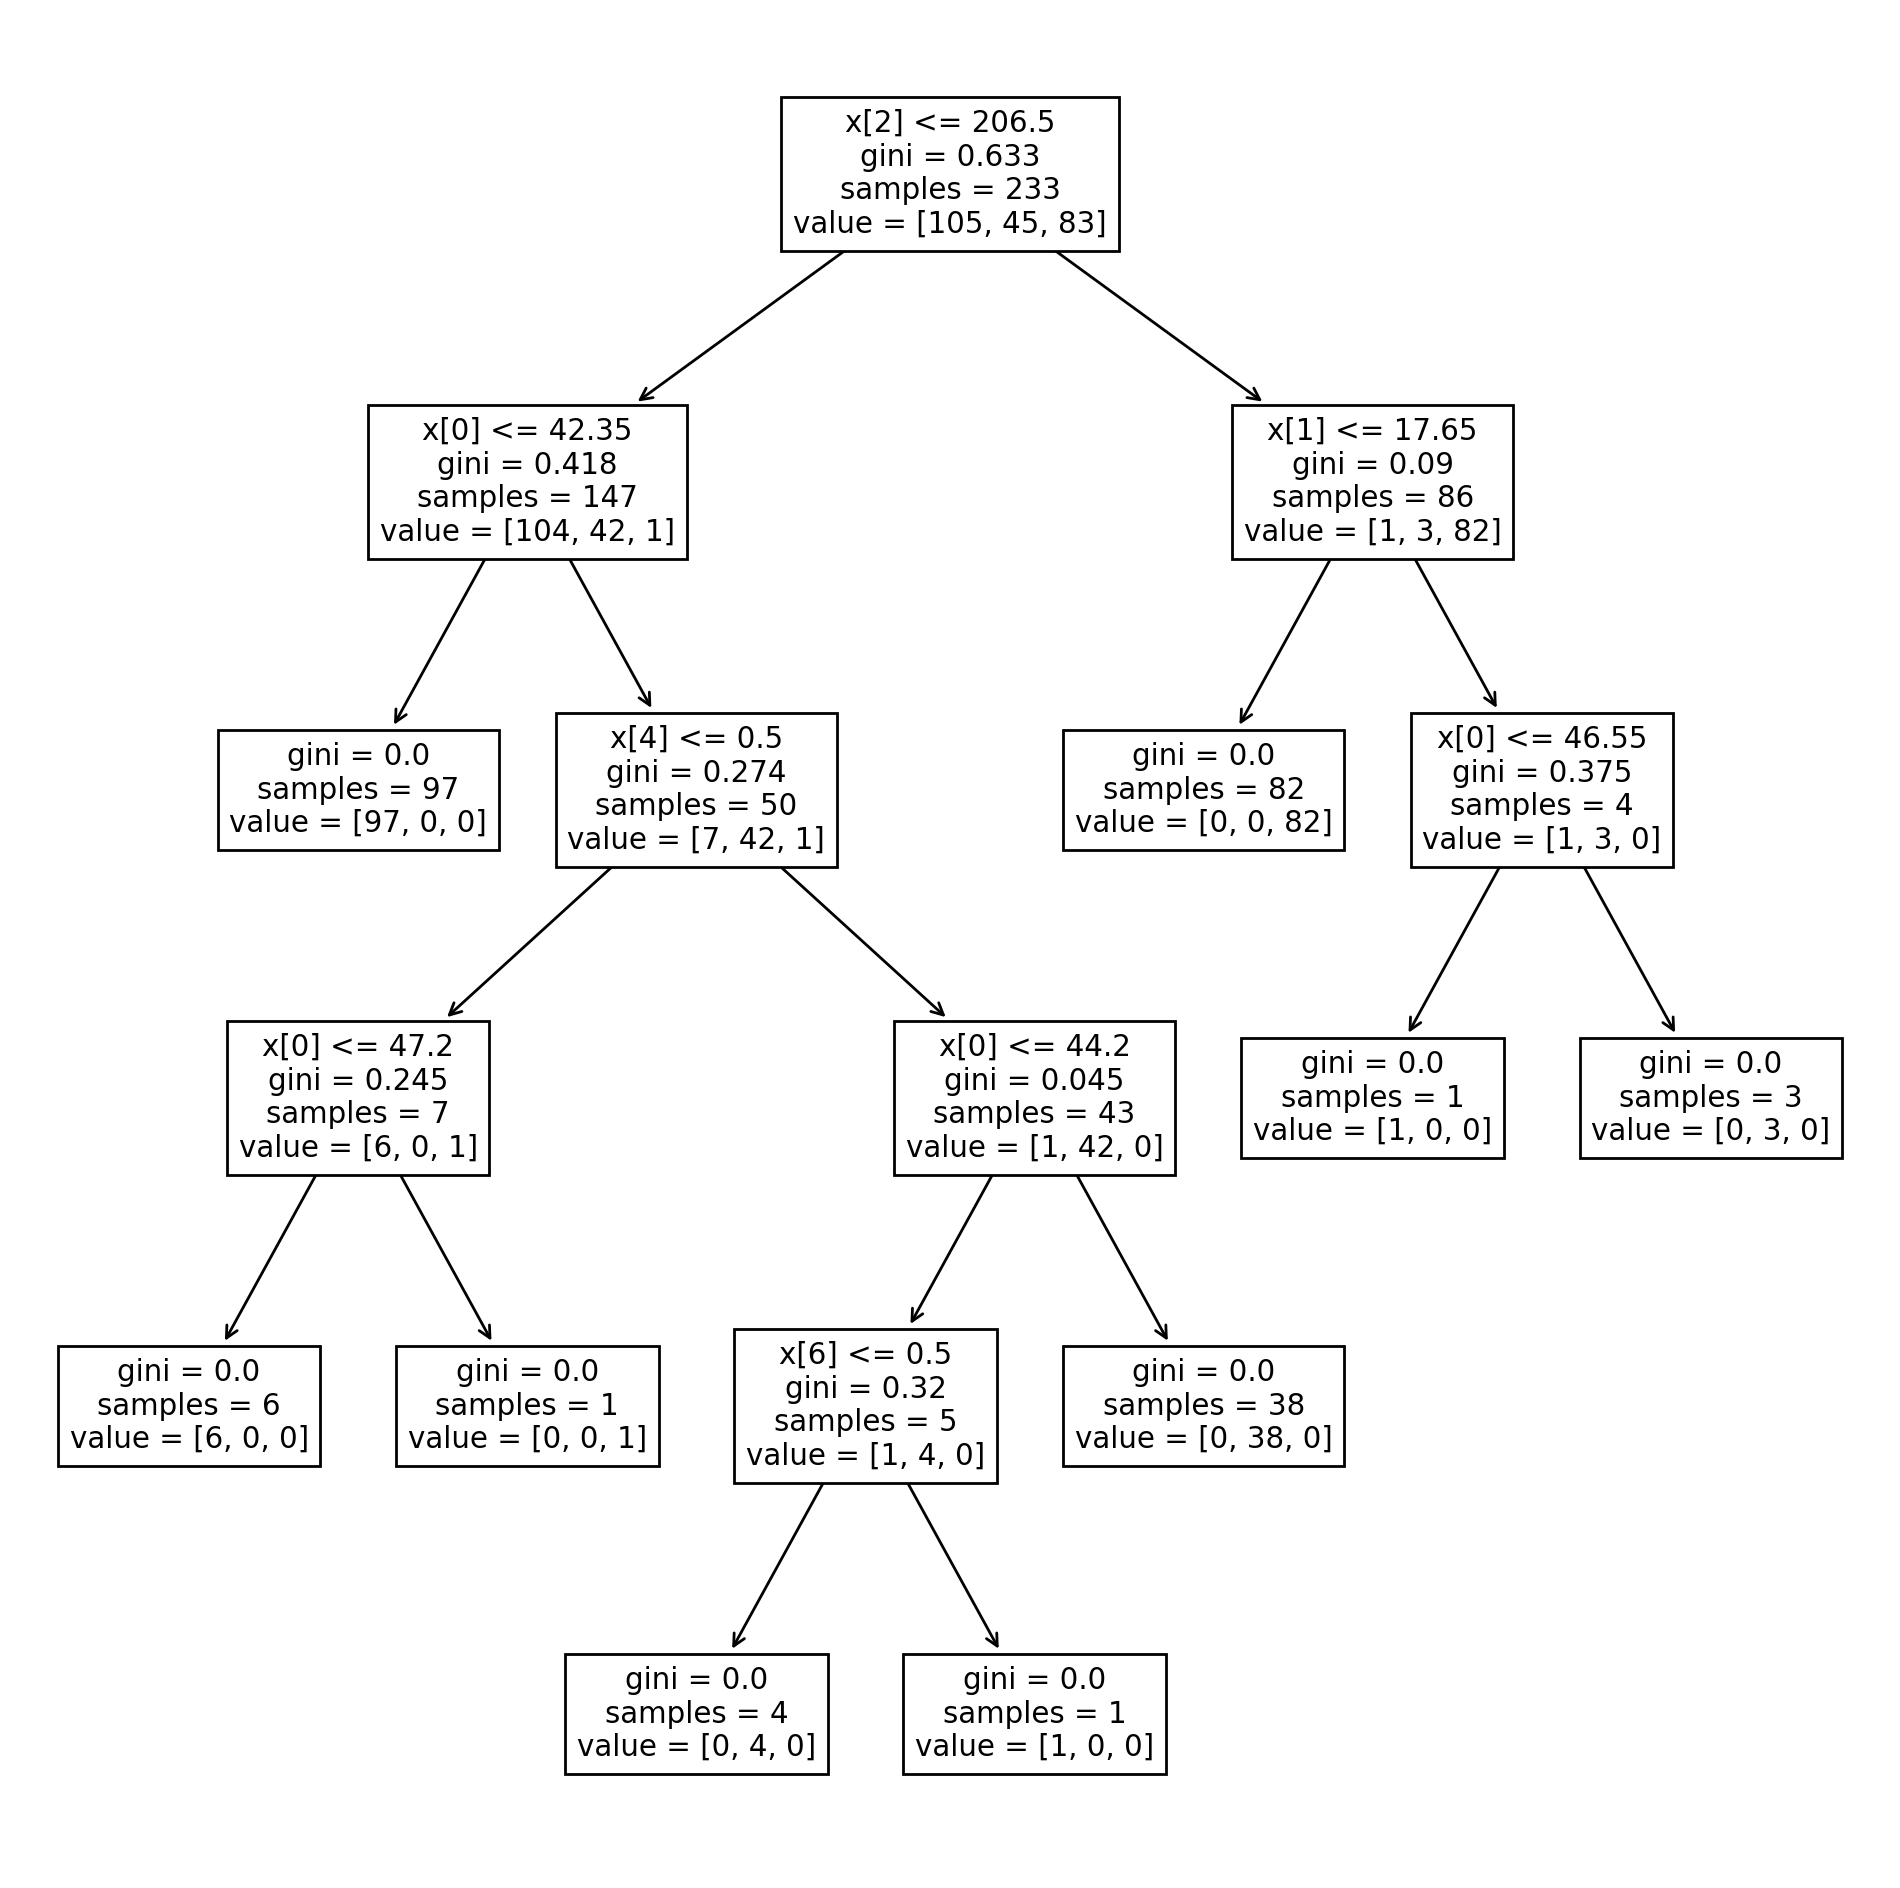

In [266]:
plt.figure(figsize=(12,12),dpi =200)
plot_tree(model);

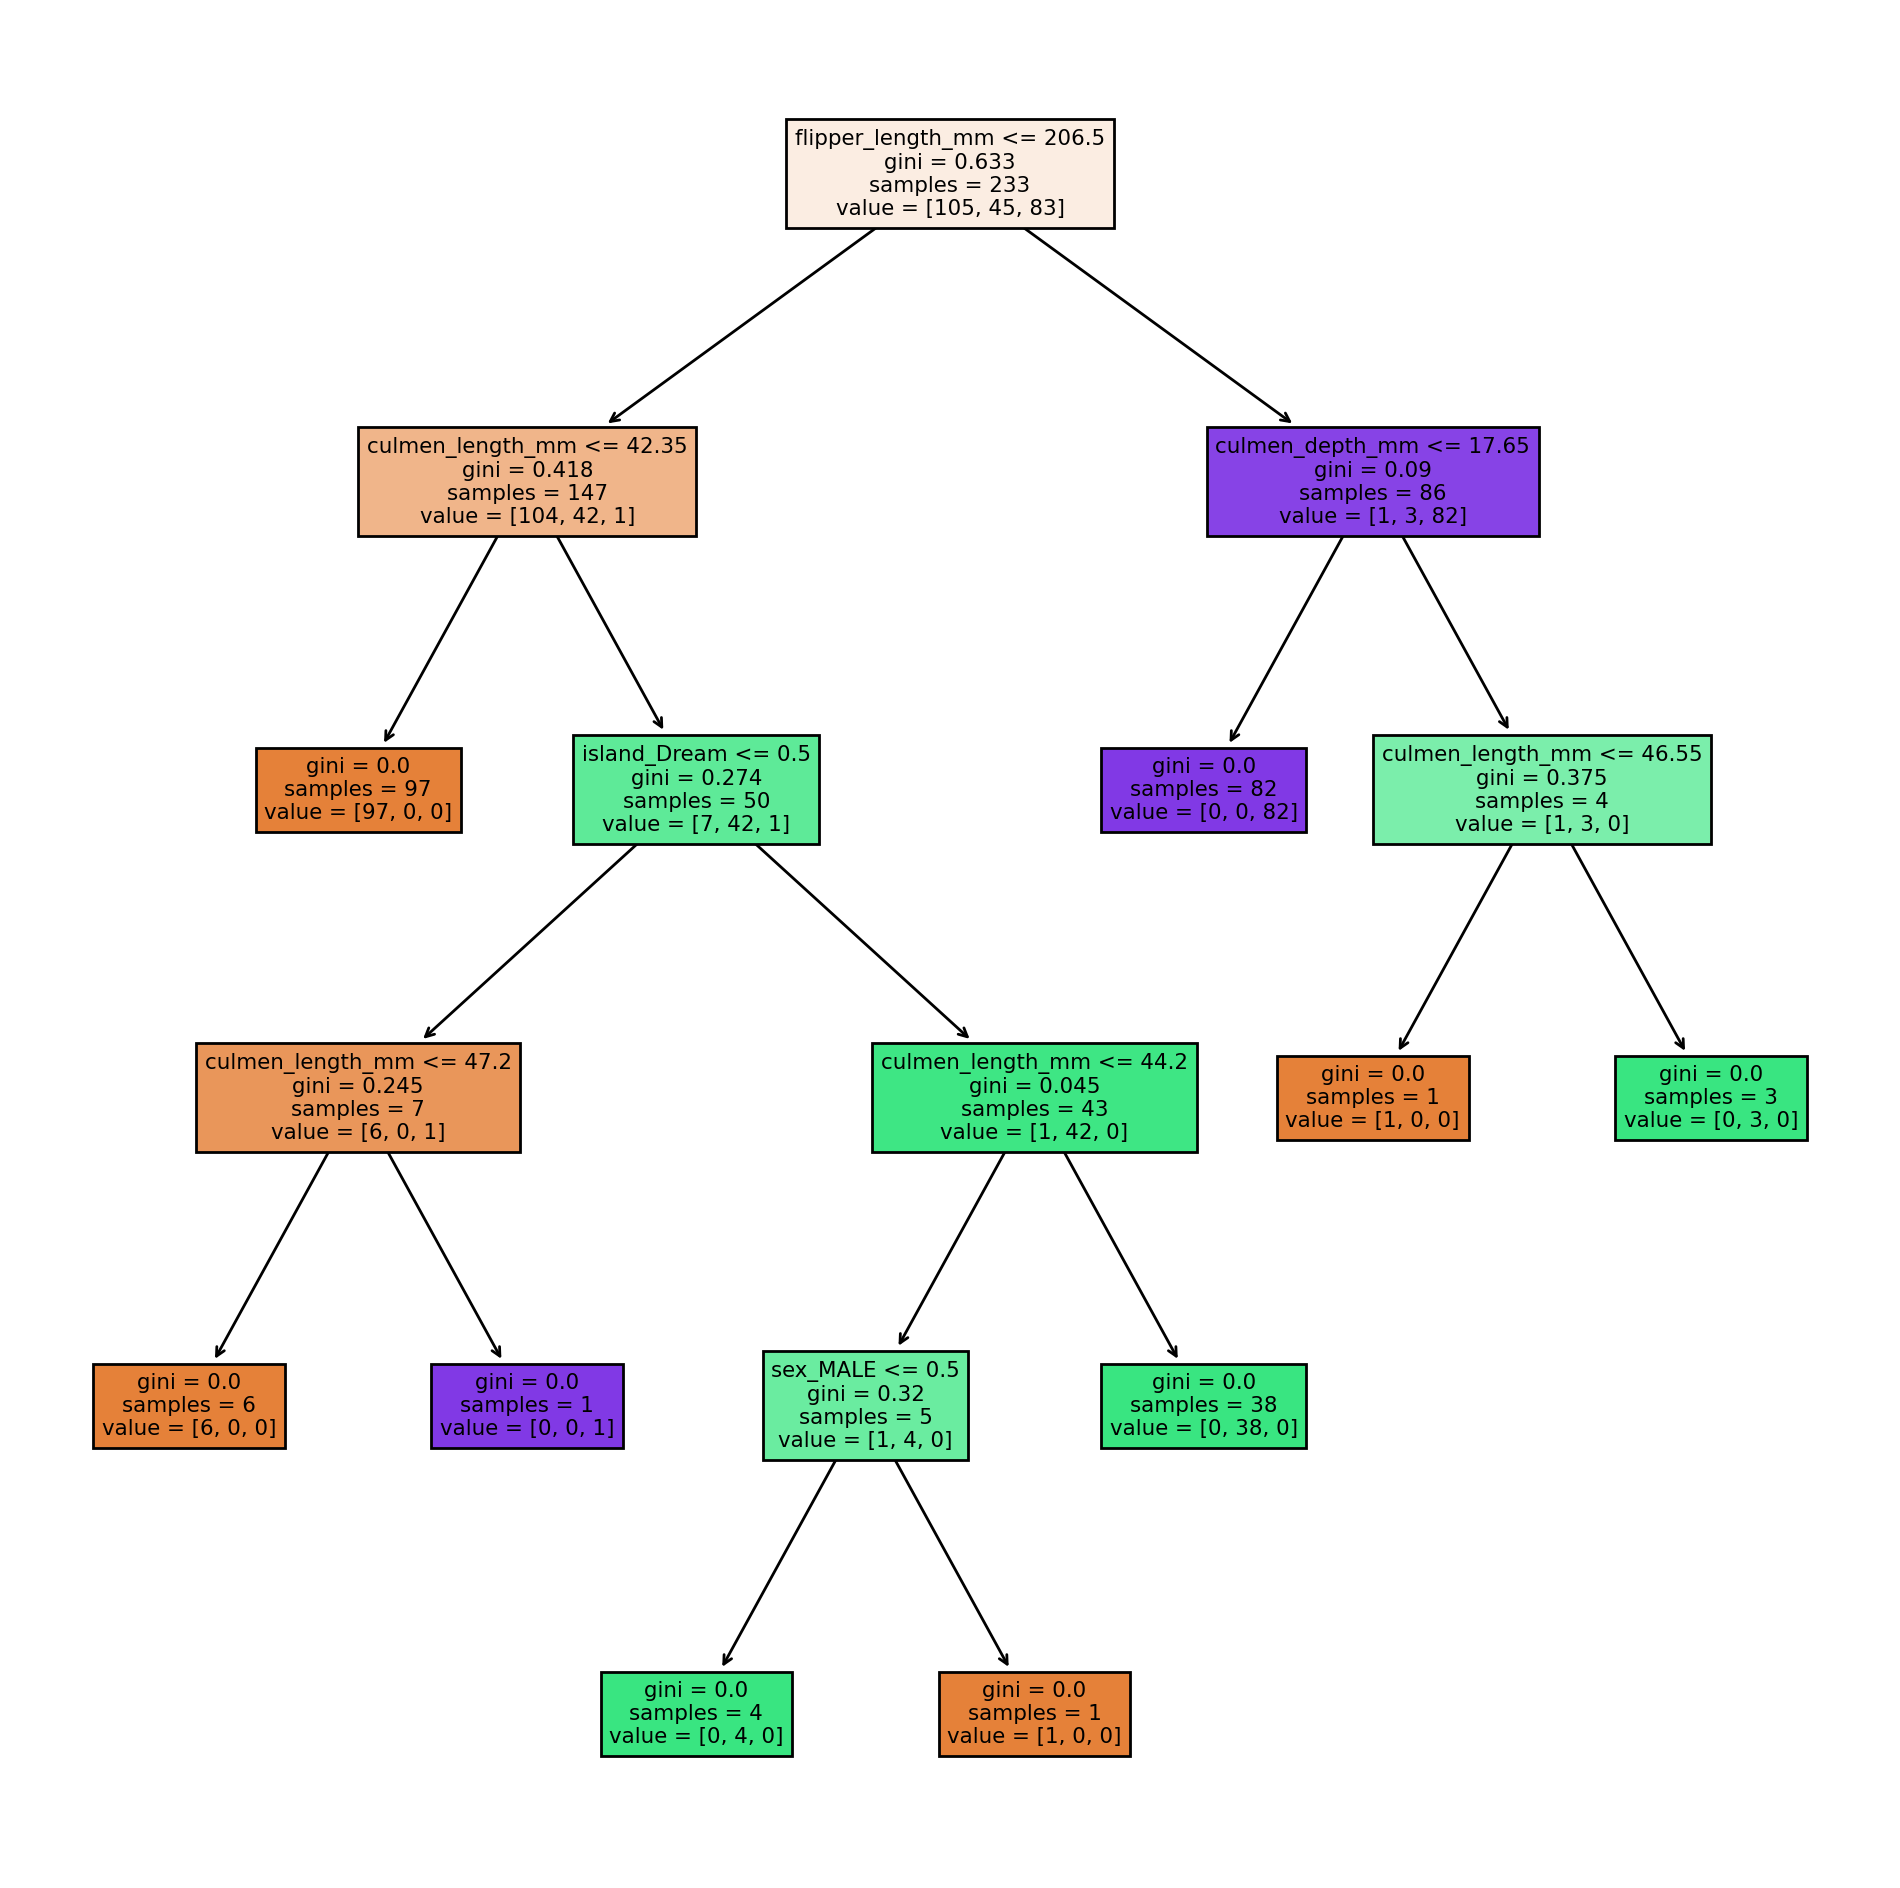

In [267]:
plt.figure(figsize=(12,12),dpi =200)
plot_tree(model,feature_names=X.columns,filled=True);